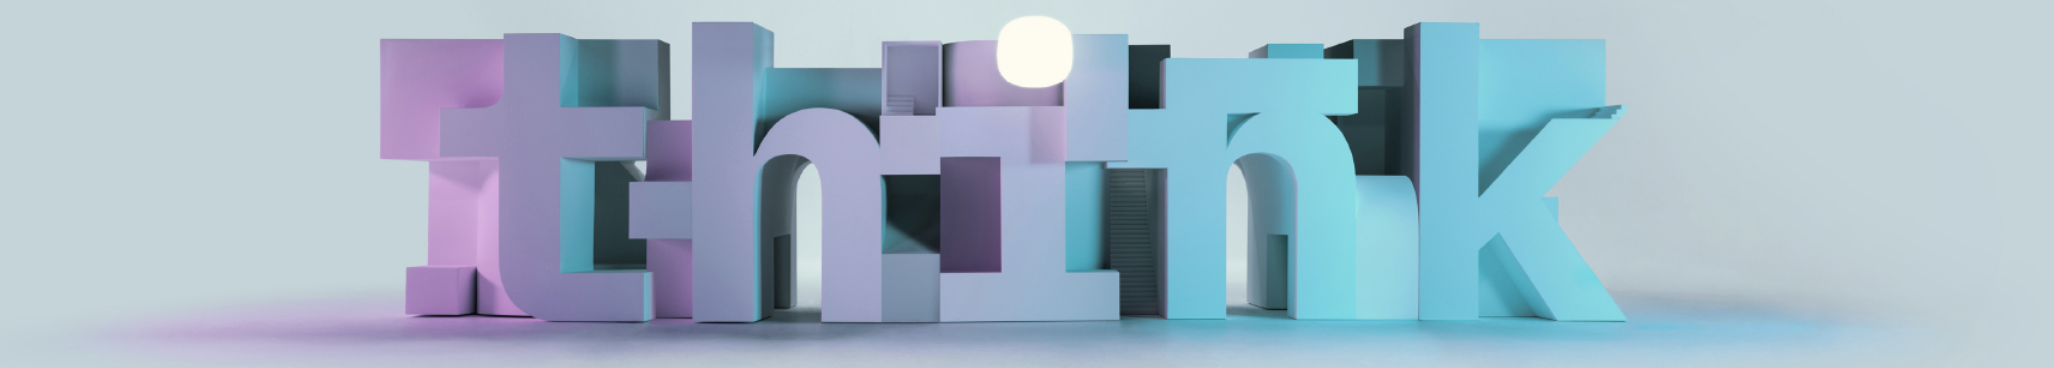



<h1><u>THINK 2021 EXERCISE VERSION</u> : For Coders and Non-Coders Break Into Deep Learning with Python and IBM Watson Studio</h1>



## Introduction

This hands-on exercise accompanies the lecture slides and lab guide for this Think 2021 session. Now that we've been introduced to the key concepts behind neural networks and Deep Learning, it's time we see a neural network in action. This will involve building our own neural nets to perform a basic image classification task—identifying which digit is contained in 27x27 pixel images of handwritten digits. In other words, in this exercise you will build a neural network aimed at recognizing and reading human handwriting.

You may choose to complete this lab as a "coder," meaning you will be asked to fill in your own code in the cells below. Don't worry, we'll be providing instructions and hints all along the way. And of course, we're always here on the call to help! Even if you haven't coded before, we believe you will still learn a lot from the "coder" path.

Alternatively, you may follow along as a "non-coder" as we walk through the solutions notebook. This will function more like an interactive lecture, where you'll follow along on your own by running pre-written code and seeing the results. Both tracks deal with the same data/task, so it's ultimately up to you which version you prefer. And of course, whichever route you take, you'll have access to both notebooks!

# Tensorflow

In [ ]:
# pip install -U tensorflow
# pip install keras
# pip install seaborn
# pip install sklearn

[Tensorflow](https://www.tensorflow.org) is an Open Source Python library (add-on) for Machine Learning, with a particular focus on Deep Learning. Developed by Google Brain in 2017, it's since become a favorite of many Data Scientists and AI specialists. We're currently using TensorFlow version 2.4.1.

**In this lab we will be using Keras on top of Tensorflow:**<br>
[Keras](https://keras.io) is a high-level neural network Application Programming Interface (API) written in Python. This open-source neural network library is designed to provide fast experimentation with deep neural networks, and it can run on top of CNTK, TensorFlow, and Theano. Keras focuses on being modular, user-friendly, and extensible. It doesn’t handle low-level computations; instead, it hands them off to another library called the Backend.

In [2]:
# Importing libraries

import numpy as np
import itertools

# Deep learning libraries
import tensorflow
import keras

import sklearn

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


## MNIST
>The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

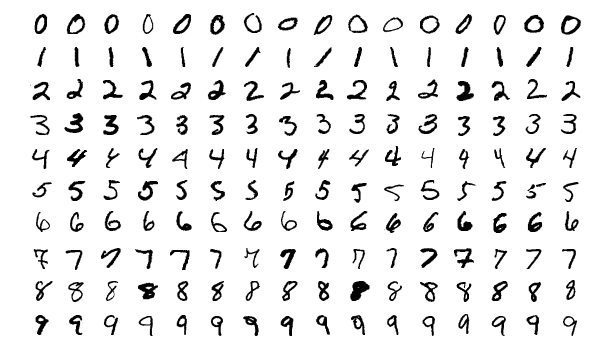

The MNIST database contains 60,000 training images and 10,000 testing images.

<b>Fun fact</b>: The image recognition algorithms have become so powerful that this problem of recognizing digits can be said to be "solved." In fact, a technical report published by IDSIA (Dalle Molle Institute for Artificial Intelligence) showed that the difference of recognition performance between the best AI algorithms and human accuracy is not statistically relevant on the MNIST dataset—on this task, AI has reached human levels of intelligence.

Other, more complex datasets such has the Fashion MNIST dataset has to be created to challenge the most recent AI algorithms.

#### Load MNIST

The MNIST dataset is made available by the Keras Library. So, we can directly load the data as followed:

In [3]:
# Loading the MNIST data

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Printing the shape of the MNIST data

print (f"Training data : {x_train.shape}")
print (f"Testing data : {x_test.shape}")

Training data : (60000, 28, 28)
Testing data : (10000, 28, 28)


#### Data Exploration

Let's directly dive into the data and visualize one of the data point.

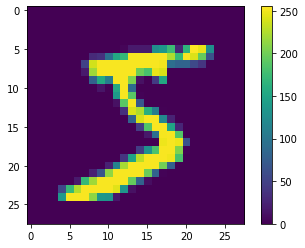

In [5]:
# Printing the X values

plt.imshow(x_train[0, :, :])
plt.colorbar()

In [6]:
# x_train[0, :, :]

In [7]:
# Printing the y values

print(f"first label : {y_train[0]}")

first label : 5


The MNIST dataset is basically made of two lists: <br>
* The list of Xs -> 28x28 images as type *array*.
* The Ys -> the labels as type *int*.

The dataset is also divided in two parts: A training set and a test set.

Now let's take a look at the distribution of digits in the dataset:

Text(0, 0.5, 'Count')

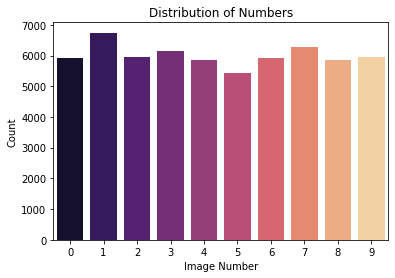

In [8]:
# plot the distribution of digits

sns.countplot(x=y_train, palette="magma")
plt.title("Distribution of Numbers")
plt.xlabel("Image Number")
plt.ylabel("Count")

The dataset is fairly balanced (uniformally distributed): We have between 5000 and 7000 samples for every digit.

## Data Preparation

The MNIST data is almost ready for use as is. Some dataset adjustments can be made to improve the performance of the model. Here, we will only normalize the data to have values between zero and one.

In [9]:
# Normalizing the data 

x_train, x_test = x_train / 255.0, x_test / 255.0

We also want to convert the labels into categorical variables. To do so, we will us the *to_categorical* function from [Keras.Utils](https://keras.io/api/utils/).

In [10]:
# Converting the dependent variables to Categorical variables

from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

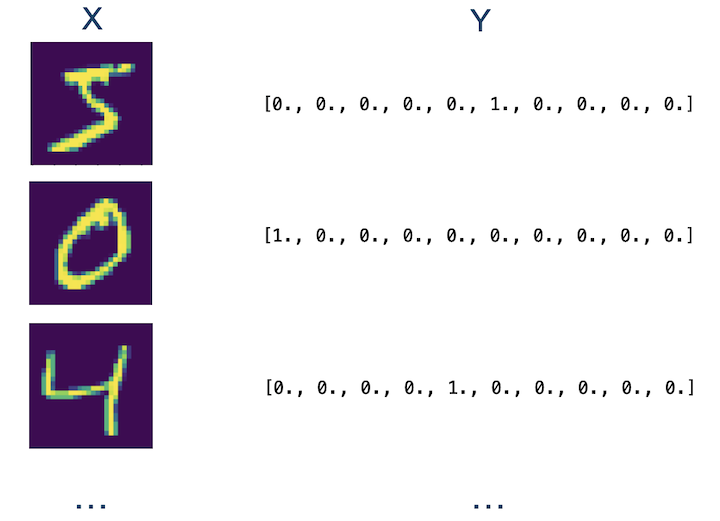

## Build a Feed Forward Neural Network for digit recognition.

#### Let's quickly remind ourselves about the structure of a Feed Forward NN

A feed forward Neural Network has an **input layer**, some **hidden layers** and an **output layer**. For the given neurons in the input layer, the network will compute hidden values or intermediate representations of the input and finally map this input to an output.<br>
**Training** the model will attempt to find the best intermediate transformations (using gradient descent—the optimiziation algorithm we've already seen) in order to map the the inputs to the relevant outputs.

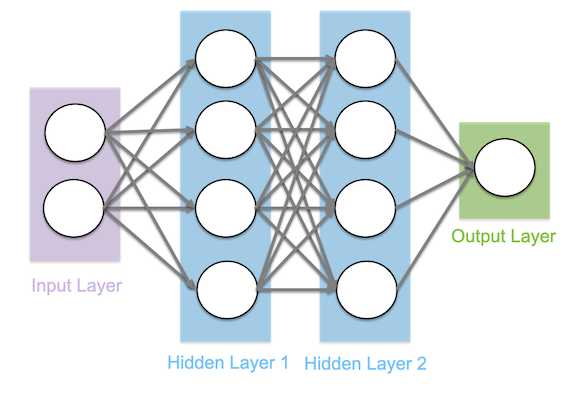

Keras allows to very simply create the structure of a neural network using a sequential model.<br>
The main idea behind a sequential model is to create an empty model and add layers sequentially from input of the model to the output.<br><br>
Let's first create an empty [sequential model](https://keras.io/api/models/sequential/).

In [11]:
# Create a sequential model

from keras.models import Sequential

model = ## YOUR CODE HERE

#### Now, how can we create a Neural network to recognize the MNIST digit images ?

We need to define the **inputs** and **outputs** of our Neural Network. Well our inputs are the Xs, the images that we try to recognize and the outputs are the answers to the recognitions, the labels so our Ys.<br>
We will train our model to recognize the correct label for the correct inputed image.
<br><br>
Now, the inputs of the neural network should be a vector, a *one dimensional vector*... but, as we saw earlier, our images are *two dimensional matrices*. In order to convert our images into vector we will use a Keras function called **Flatten** as a first layer to our model.

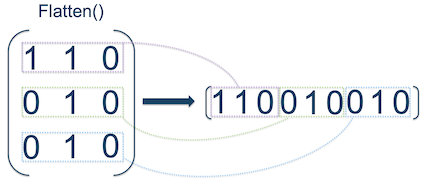

The **Flatten Layer** will serve as **input** for our network, it will take the 28x28 images and translate it into a 784 long vector ready to be passed to the first hidden layer.<br><br>
Keras provide a very simple interface to add Layers to a sequential model. To add a Flatten layer to your model, you first need to instanciate the [flatten layer](https://keras.io/api/layers/reshaping_layers/flatten/) and then add the created instance to the model using the add method of the [sequential model](https://keras.io/api/models/sequential/).<br>

*hint: Because this is the input layer the input_shape parameter should be specified*

In [52]:
# Adding the input layer to the model

from keras.layers import Flatten

## YOUR CODE HERE

#### Let's now add a Dense Hidden Layer

Following the flatten layer in our network's structure we will have some Hidden layers. For this use case we will use "normal layers" called **Dense Layers**. These layers transform their inputs and pass this transformed representation to the following layer. <br>

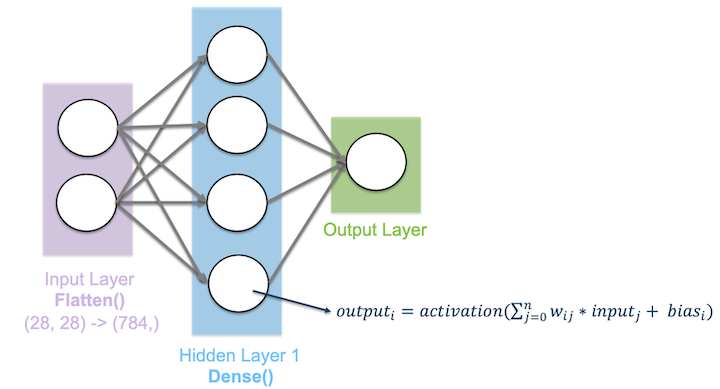

The Dense layers must have at least <u>two parameters</u> :
* <u>The activation function</u>: A non linear function used to break the linearity of the transformation. In more simple terms, activation functions are applied to neuron's activation values (calculated by weights and biases) to make them more mathematically "flexible"—such that the network can build more complex and variegated paths through the hidden layers.


In Keras, you can add [Dense Layers](https://keras.io/api/layers/core_layers/dense/) just like you added the flatten layer.<br>

*hint: you can use the 'relu' activation function and take a layer size of 128*


In [51]:
# Adding a hidden layer to the model

from keras.layers import Dense

## YOUR CODE HERE

#### Finally we add the output layer

Finally the output layer will also be a **Dense Layer** of size 10. The vectors of size 10 outputted by the last layer is our prediction! 

Let's finalize our Keras model by adding the output [Dense Layer](https://keras.io/api/layers/core_layers/dense/).

*hint: for the output layer use the 'sigmoid' activation layer*

In [14]:
# Adding the output layer to the model

## YOUR CODE HERE

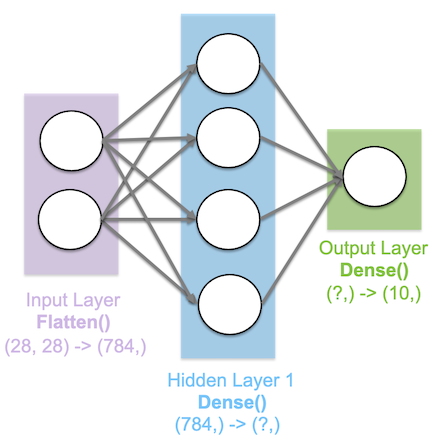

#### Compiling the model

The compilation of the model is the last step of the creation of the model. After compiling the model we will be able to train it. When compiling the model we give to the model the additional information it needs in order train. So far we only created the structure of the network, now we need to specify what loss function we want to optimize the model on, with which optimization algorithm we want to train the model and what is our evaluation metric.

Let's quickly take a closer look at these three components of the Keras model.
* The Loss: The Loss function is used to find error in deviation during the learning process
* The Optimizer: The Optimizer is the algorithm that will be used during to training phase to minimize the Loss on our training data
* The Evaluation Metrics: These are basically just the metrics used to evaluate the model (how accurate it is)


With Keras we compile a *Keras.Model* by calling its *compile* method. [Here](https://www.tutorialspoint.com/keras/keras_model_compilation.htm) is an helper link from keras tutorials.

In [15]:
# Compiling the model

## YOUR CODE HERE

Our model is now fully created and ready to be trained. We can visualize the model using the summary() method.


In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


#### Training - Fit the Keras model

Its now time to fit or train our model. By calling the fit function, the pseudo code of this training procedure can be written as follow:
___
Initialize the weights of the neural network randomly.<br>
**for** every image, label in the training set:
1. **Evaluate** the output of the neural network for the input image.
2. **Compute the loss** between the evaluated output and the actual label.
3. **Apply the Optimizer** to this loss value to optimize the weights of the network.
___

This Algorithm will be repeated several times for the whole training set. The number of times the training go over the training set is called the **number of epochs**.

To [train the Keras model](https://keras.io/api/models/model_training_apis/) you can call the fit method of the model object. This method requires at least three inputs, the *Xs* the *Ys* and the *number of epochs*.

In [17]:
# Training the model with 5 epochs

## YOUR CODE HERE

Epoch 1/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.4335 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 1s 708us/step - loss: 0.1198 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 1s 706us/step - loss: 0.0783 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 1s 715us/step - loss: 0.0589 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 1s 714us/step - loss: 0.0422 - accuracy: 0.9881


#### The training has now completed!
We can now use the trained model to recognize new digit images using the *predict* method.

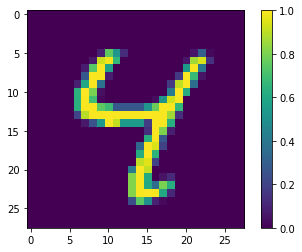

In [46]:
# Plot images from the test set

image_test = x_test[6, :, :]
plt.imshow(image_test)
plt.colorbar()

In [55]:
# Prinding on prediction from the test set
prediction = model.predict(image_test.reshape(1, 28, 28))
print(prediction)

[[2.5882954e-07 5.2201748e-04 3.9747214e-05 1.0389422e-04 9.9999517e-01
  2.7298659e-02 2.3189187e-04 4.8843235e-02 7.8264850e-01 5.1526356e-01]]


In [48]:
print (f"Prediction : {prediction[0].argmax()}")

Prediction : 4


## Model Evaluation

Let's now evaluate our model against the testing set. The [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) is an handy tool to evaluate multi-class classifications.

In order to predict new values you can use the *predict* method of the [model](https://keras.io/api/models/model/). Use the method to predict the labels of x_test.

In [20]:
# Predicting the test set

## YOUR CODE HERE

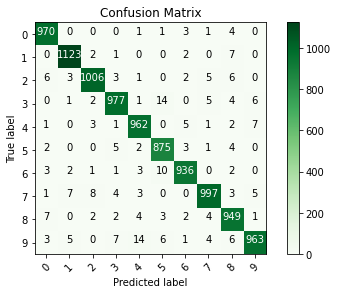

In [21]:
# Plot the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.argmax(y_test, axis=1), 
                      np.argmax(y_pred, axis = 1)) 

plt.imshow(cm, cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
classes = range(10)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Let's now compute the accuracy on the test set. To do so you can use the *evaluate* method of the [model](https://keras.io/api/models/model/).

In [1]:
# Evaluating the model

## YOUR CODE HERE

## [Optional] Improve the performance with a Convolutional Neural Network

In this section we use the exact same process but instead of creating a Feed-Forward Neural Network we use another kind of network called **Convolutional Neural Network** of CNN for short. These Neural Networks are more computationally demanding than Feed Forward Neural Networks but they are more performant for image recognition.

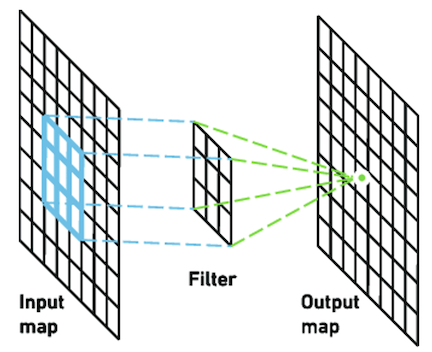


If you want to learn more about Conlutional Networks for Image Recognition we invite you to follow this [link](https://cs231n.github.io/convolutional-networks/).

In [23]:
# Importing some additional layers

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout

For this model we need to reshape the inputs into the shape expected by the Convolution layer. <br>
*Reason : Images are usually represented as 3 dimensional arrays where the third dimension is used for the colors.*

In [50]:
# Reshaping the input images

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [25]:
# Building the sequential network 

model_cnn = Sequential()

model_cnn.add(Conv2D(32, [3, 3], activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(Conv2D(64, [3, 3], activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))


In [26]:
# Compiling the model

## Your Code here

In [27]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [28]:
# Training the model

## YOUR CODE HERE

469/469 [==============================] - 45s 96ms/step - loss: 0.4111 - accuracy: 0.8684


In [49]:
# Evaluating the model

## YOUR CODE HERE

313/313 [==============================] - 0s 912us/step - loss: 0.0754 - accuracy: 0.9758


### Think 21 - For Coders and Non-coder Break Into Deep Learning with Python and IBM Watson Studio